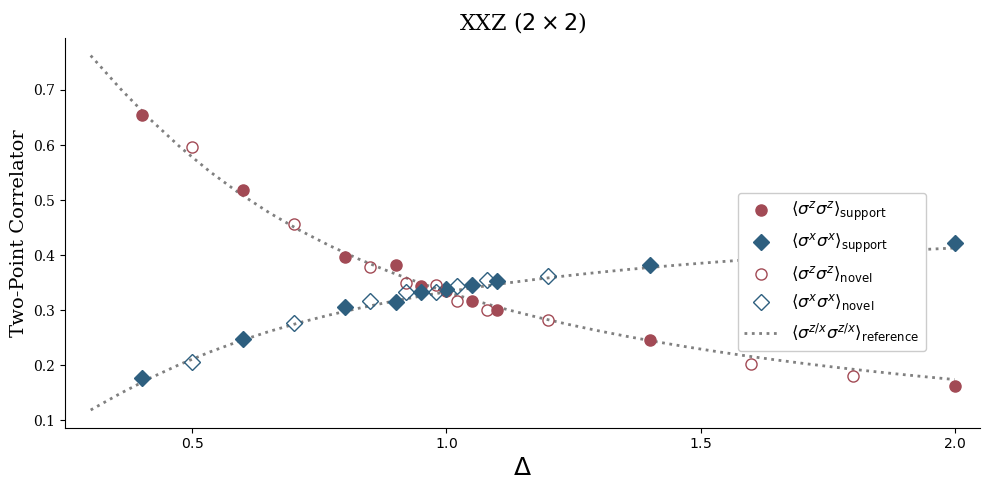

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


SIDE_LENGTH = 2
file_prefix = f"xxz_{SIDE_LENGTH}x{SIDE_LENGTH}_correlations"


#### DATA IMPORT

ref_df = pd.read_csv(file_prefix + "_ref.csv", usecols=["delta", "czz_diag", "cxx_diag"])
ref_df = ref_df.apply(pd.to_numeric, errors="coerce").sort_values("delta").reset_index(drop=True)

rbm_df = pd.read_csv(file_prefix + "_rbm.csv", usecols=["delta", "type", "czz_diag", "cxx_diag"])
rbm_df["type"] = rbm_df["type"].astype(str).str.strip().str.lower()

rbm_novel_df = rbm_df[rbm_df["type"] == "novel"].drop(columns="type")
rbm_novel_df.apply(pd.to_numeric, errors="coerce").sort_values("delta").reset_index(drop=True)

rbm_support_df = rbm_df[rbm_df["type"] == "support"].drop(columns="type")
rbm_support_df.apply(pd.to_numeric, errors="coerce").sort_values("delta").reset_index(drop=True)


#### FIGURE STYLE

english_red = '#a24a55'
bdazzled_blue = '#2e5f7f'
plt.rcParams.update({"font.family": "serif"})

fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')
ax.set_facecolor('white')

ax.plot(rbm_support_df["delta"], rbm_support_df["czz_diag"], 'o', color=english_red,
        markersize=8, label=r'$\langle \sigma^z \sigma^z \rangle_{\mathrm{support}}$', zorder=2)
ax.plot(rbm_support_df["delta"], rbm_support_df["cxx_diag"], 'D', color=bdazzled_blue,
        markersize=8, label=r'$\langle \sigma^x \sigma^x \rangle_{\mathrm{support}}$', zorder=2)

ax.plot(rbm_novel_df["delta"], rbm_novel_df["czz_diag"], 'o', markerfacecolor='none', markeredgecolor=english_red,
        markersize=8, label=r'$\langle \sigma^z \sigma^z \rangle_{\mathrm{novel}}$', zorder=2)
ax.plot(rbm_novel_df["delta"], rbm_novel_df["cxx_diag"], 'D', markerfacecolor='none', markeredgecolor=bdazzled_blue,
        markersize=8, label=r'$\langle \sigma^x \sigma^x \rangle_{\mathrm{novel}}$', zorder=2)

ax.plot(ref_df["delta"], ref_df["czz_diag"], ':', color='gray', linewidth=2.0, label='_nolegend_', zorder=1)
ax.plot(ref_df["delta"], ref_df["cxx_diag"], ':', color='gray', linewidth=2.0,
        label=r'$\langle \sigma^{z/x} \sigma^{z/x} \rangle_{\mathrm{reference}}$', zorder=1)

ax.set_xlabel(r'$\Delta$', fontsize=18)
ax.set_ylabel('Two-Point Correlator', fontsize=14)
ax.set_title(fr"XXZ ($ {SIDE_LENGTH} \times {SIDE_LENGTH} $)", fontsize=16)

delta_range = ref_df["delta"].to_numpy()
d_min, d_max = float(np.nanmin(delta_range)), float(np.nanmax(delta_range))
ax.set_xlim(d_min - 0.05, d_max + 0.05)
xticks = np.arange(np.ceil(d_min * 2) / 2, np.floor(d_max * 2) / 2 + 0.01, 0.5)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${x:.1f}$" for x in xticks])

ax.legend(frameon=True, framealpha=1, loc='center right', bbox_to_anchor=(0.95, 0.4), fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('xxz_correlators_highres.png', dpi=300)
plt.show()